**USER QUESTION ANSWERING PROJECT:**


Question answering (QA) is a computer science discipline within the fields of information retrieval and natural language processing (NLP) that is concerned with building systems that automatically answer questions that are posed by humans in a natural language.

**MODEL-1: USING TRANSFORMER MODEL**



In [1]:
pip install transformers

In [2]:
from transformers import pipeline

In [3]:
qa_model = pipeline("question-answering")
question = "Where is the ball?"
context = "The chair is near the table, and the ball is behind the chair."
qa_response = qa_model(question = question, context = context)
print(qa_response)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recom

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.8110511302947998, 'start': 45, 'end': 61, 'answer': 'behind the chair'}


In [4]:
context = "Python is a high-level, general-purpose programming language. Its design " \
"philosophy emphasizes code readability with the use of significant indentation. " \
"Python is dynamically typed and garbage-collected. It supports multiple programming " \
"paradigms, including structured (particularly procedural), object-oriented and " \
"functional programming. It is often described as a \"batteries included\" language " \
"due to its comprehensive standard library."

question = "What does the Python design emphasize?"

qa_response = qa_model(question = question, context = context)
print(qa_response)

{'score': 0.7124277353286743, 'start': 95, 'end': 111, 'answer': 'code readability'}


**MODEL-2: USING 20NEWSGROUPS DATASET**

1.IMPORTING THE LIBRARIES:

In [5]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

2.IMPORTING THE DATASET:

In [6]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train', categories=['comp.graphics'])
print(newsgroups.data[0])

From: bbs.mirage@tsoft.net (Jerry Lee)
Subject: Cobra 2.0 1-b-1 Video card HELP ME!!!!
Organization: The TSoft BBS and Public Access Unix, +1 415 969 8238
Lines: 22

Does ANYONE out there in Net-land have any information on the Cobra 2.20 
card?  The sticker on the end of the card reads
        Model: Cobra 1-B-1
        Bios:  Cobra v2.20

I Havn't been able to find anything about it from anyone!  If you have 
any information on how to get a hold of the company which produces the 
card or know where any drivers are for it, PLEASE let me know!

As far as I can tell, it's a CGA card that is taking up 2 of my 16-bit 
ISA slots but when I enable the test patterns, it displays much more than 
the usualy 4 CGA colors... At least 16 from what I can count.. Thanks!

              .------------------------------------------.
              : Internet: jele@eis.calstate.edu          :
              :           bbs.mirage@gilligan.tsoft.net  :
              :           bbs.mirage@tsoft.sf-bay.org

In [7]:
sample_document = newsgroups.data[0]

3.TOKENIZATION:

In [8]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(newsgroups.data[0])
print(tokens)

['From', ':', 'bbs.mirage', '@', 'tsoft.net', '(', 'Jerry', 'Lee', ')', 'Subject', ':', 'Cobra', '2.0', '1-b-1', 'Video', 'card', 'HELP', 'ME', '!', '!', '!', '!', 'Organization', ':', 'The', 'TSoft', 'BBS', 'and', 'Public', 'Access', 'Unix', ',', '+1', '415', '969', '8238', 'Lines', ':', '22', 'Does', 'ANYONE', 'out', 'there', 'in', 'Net-land', 'have', 'any', 'information', 'on', 'the', 'Cobra', '2.20', 'card', '?', 'The', 'sticker', 'on', 'the', 'end', 'of', 'the', 'card', 'reads', 'Model', ':', 'Cobra', '1-B-1', 'Bios', ':', 'Cobra', 'v2.20', 'I', 'Hav', "n't", 'been', 'able', 'to', 'find', 'anything', 'about', 'it', 'from', 'anyone', '!', 'If', 'you', 'have', 'any', 'information', 'on', 'how', 'to', 'get', 'a', 'hold', 'of', 'the', 'company', 'which', 'produces', 'the', 'card', 'or', 'know', 'where', 'any', 'drivers', 'are', 'for', 'it', ',', 'PLEASE', 'let', 'me', 'know', '!', 'As', 'far', 'as', 'I', 'can', 'tell', ',', 'it', "'s", 'a', 'CGA', 'card', 'that', 'is', 'taking', 'up',

4.POS TAGGING:

In [9]:
from nltk import pos_tag
pos_tags = pos_tag(tokens)
print(pos_tags)

[('From', 'IN'), (':', ':'), ('bbs.mirage', 'NN'), ('@', 'JJ'), ('tsoft.net', 'NN'), ('(', '('), ('Jerry', 'NNP'), ('Lee', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('Cobra', 'JJ'), ('2.0', 'CD'), ('1-b-1', 'JJ'), ('Video', 'NNP'), ('card', 'NN'), ('HELP', 'NNP'), ('ME', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.'), ('!', '.'), ('Organization', 'NN'), (':', ':'), ('The', 'DT'), ('TSoft', 'NNP'), ('BBS', 'NNP'), ('and', 'CC'), ('Public', 'NNP'), ('Access', 'NNP'), ('Unix', 'NNP'), (',', ','), ('+1', 'VBD'), ('415', 'CD'), ('969', 'CD'), ('8238', 'CD'), ('Lines', 'NNS'), (':', ':'), ('22', 'CD'), ('Does', 'NNP'), ('ANYONE', 'NNP'), ('out', 'IN'), ('there', 'RB'), ('in', 'IN'), ('Net-land', 'NNP'), ('have', 'VBP'), ('any', 'DT'), ('information', 'NN'), ('on', 'IN'), ('the', 'DT'), ('Cobra', 'NNP'), ('2.20', 'CD'), ('card', 'NN'), ('?', '.'), ('The', 'DT'), ('sticker', 'NN'), ('on', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('the', 'DT'), ('card', 'NN'), ('reads', 'VBZ'), (

5.NAMED ENTITY RECOGNITION:

In [10]:
from nltk import ne_chunk
ner_result = ne_chunk(pos_tags)
print(ner_result)

(S
  From/IN
  :/:
  bbs.mirage/NN
  @/JJ
  tsoft.net/NN
  (/(
  (PERSON Jerry/NNP Lee/NNP)
  )/)
  Subject/NN
  :/:
  Cobra/JJ
  2.0/CD
  1-b-1/JJ
  Video/NNP
  card/NN
  (ORGANIZATION HELP/NNP)
  ME/NNP
  !/.
  !/.
  !/.
  !/.
  Organization/NN
  :/:
  The/DT
  (ORGANIZATION TSoft/NNP)
  BBS/NNP
  and/CC
  (PERSON Public/NNP Access/NNP Unix/NNP)
  ,/,
  +1/VBD
  415/CD
  969/CD
  8238/CD
  Lines/NNS
  :/:
  22/CD
  Does/NNP
  ANYONE/NNP
  out/IN
  there/RB
  in/IN
  (GPE Net-land/NNP)
  have/VBP
  any/DT
  information/NN
  on/IN
  the/DT
  Cobra/NNP
  2.20/CD
  card/NN
  ?/.
  The/DT
  sticker/NN
  on/IN
  the/DT
  end/NN
  of/IN
  the/DT
  card/NN
  reads/VBZ
  (PERSON Model/NNP)
  :/:
  Cobra/NNP
  1-B-1/JJ
  Bios/NNS
  :/:
  Cobra/NNP
  v2.20/NN
  I/PRP
  Hav/VBP
  n't/RB
  been/VBN
  able/JJ
  to/TO
  find/VB
  anything/NN
  about/IN
  it/PRP
  from/IN
  anyone/NN
  !/.
  If/IN
  you/PRP
  have/VBP
  any/DT
  information/NN
  on/IN
  how/WRB
  to/TO
  get/VB
  a/DT
  hold/NN
  of

In [11]:
sample_document = newsgroups.data[0]
tokens = nltk.word_tokenize(sample_document)
pos_tags = nltk.pos_tag(tokens)
ner_result = nltk.ne_chunk(pos_tags)

6.ENTITY EXTRACTION:

In [12]:
def extract_entities(named_entities, entity_type):
    entities = [entity[0] for entity in named_entities if isinstance(entity, tuple) and entity[1] == entity_type]
    return entities

7.DEFINING FUNCTION FOR QUESTION ANSWERING ALGORITHM:

In [13]:
def question_answering_algorithm(question, named_entities):
    if 'software' in question.lower():
        # Extract software-related entities
        software_entities = extract_entities(named_entities, 'ORGANIZATION')
        if software_entities:
            return f"The document mentions the following graphic design software: {', '.join(software_entities)}"
        else:
            return "No graphic design software is mentioned in the document."
    else:
        return "I'm sorry, I can't answer that question."

8.OUTPUT:

In [14]:
question = "What graphic design software is mentioned in the document?"
answer = question_answering_algorithm(question, ner_result)
print(answer)

No graphic design software is mentioned in the document.


9.PLOTTING THE FREQUENCY OF NAMED ENTITIES:

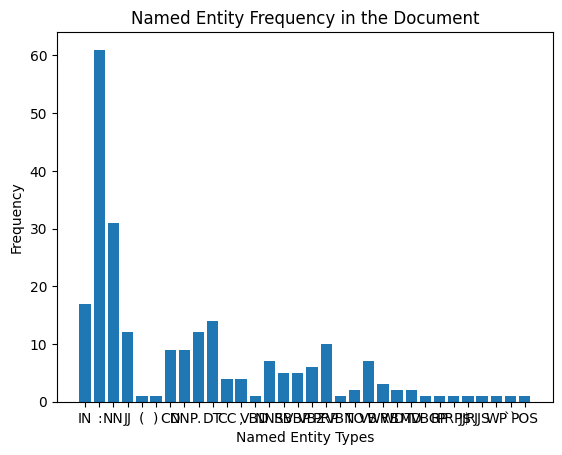

In [15]:
import matplotlib.pyplot as plt
from collections import Counter


named_entities = [entity for entity in ner_result if isinstance(entity, tuple)]
entity_counts = Counter(entity[1] for entity in named_entities)

plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel('Named Entity Types')
plt.ylabel('Frequency')
plt.title('Named Entity Frequency in the Document')
plt.show()

Thus, the user question answering model has been implemented successfully using transformers and named entity models.